In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('bankrefined.csv')

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
def custom_recall(preds, dtrain):
    labels = dtrain.get_label()
    preds = np.round(preds)
    recall = recall_score(labels, preds)
    return 'recall', recall

In [ ]:
estimators = [('clf', RandomForestClassifier(random_state=1))]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('clf', RandomForestClassifier(random_state=1))])

In [ ]:
!pip install scikit-optimize
!pip install 'scikit-optimize[plots]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.6 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
search_space = {
    'clf__n_estimators': Integer(100, 1000),
    'clf__max_depth': Integer(2,10),
    'clf__criterion': Categorical(['gini', 'entropy', 'log_loss']),
    'clf__min_samples_split' : Integer(2,10),
    'clf__min_samples_leaf' : Integer(1,4),
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=100, scoring='recall', random_state=1)

In [ ]:
opt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('clf',
                                         RandomForestClassifier(random_state=1))]),
              n_iter=100, random_state=1, scoring='recall',
              search_spaces={'clf__criterion': Categorical(categories=('gini', 'entropy', 'log_loss'), prior=None),
                             'clf__max_depth': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'clf__min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'clf__min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'clf__n_estimators': Integer(low=100, high=1000, prior='uniform', transform='normalize')})

In [ ]:
model=opt.best_estimator_
model

Pipeline(steps=[('clf',
                 RandomForestClassifier(criterion='log_loss', max_depth=9,
                                        min_samples_split=10, n_estimators=110,
                                        random_state=1))])

In [ ]:
params = model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

memory: None
steps: [('clf', RandomForestClassifier(criterion='log_loss', max_depth=9, min_samples_split=10,
                       n_estimators=110, random_state=1))]
verbose: False
clf: RandomForestClassifier(criterion='log_loss', max_depth=9, min_samples_split=10,
                       n_estimators=110, random_state=1)
clf__bootstrap: True
clf__ccp_alpha: 0.0
clf__class_weight: None
clf__criterion: log_loss
clf__max_depth: 9
clf__max_features: sqrt
clf__max_leaf_nodes: None
clf__max_samples: None
clf__min_impurity_decrease: 0.0
clf__min_samples_leaf: 1
clf__min_samples_split: 10
clf__min_weight_fraction_leaf: 0.0
clf__n_estimators: 110
clf__n_jobs: None
clf__oob_score: False
clf__random_state: 1
clf__verbose: 0
clf__warm_start: False


In [ ]:
paramg={
    'clf__n_estimators': [110, 105, 115],
    'clf__max_depth': [9,10,8],
    'clf__min_samples_split' : [12,10,11],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gmodel = GridSearchCV(estimator=model, param_grid=paramg, cv=3, scoring='recall')

In [ ]:
gmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('clf',
                                        RandomForestClassifier(criterion='log_loss',
                                                               max_depth=9,
                                                               min_samples_split=10,
                                                               n_estimators=110,
                                                               random_state=1))]),
             param_grid={'clf__max_depth': [9, 10, 8],
                         'clf__min_samples_split': [12, 10, 11],
                         'clf__n_estimators': [110, 105, 115]},
             scoring='recall')

In [ ]:
params1 = gmodel.get_params()
for param, value in params1.items():
    print(f"{param}: {value}")

cv: 3
error_score: nan
estimator__memory: None
estimator__steps: [('clf', RandomForestClassifier(criterion='log_loss', max_depth=9, min_samples_split=10,
                       n_estimators=110, random_state=1))]
estimator__verbose: False
estimator__clf: RandomForestClassifier(criterion='log_loss', max_depth=9, min_samples_split=10,
                       n_estimators=110, random_state=1)
estimator__clf__bootstrap: True
estimator__clf__ccp_alpha: 0.0
estimator__clf__class_weight: None
estimator__clf__criterion: log_loss
estimator__clf__max_depth: 9
estimator__clf__max_features: sqrt
estimator__clf__max_leaf_nodes: None
estimator__clf__max_samples: None
estimator__clf__min_impurity_decrease: 0.0
estimator__clf__min_samples_leaf: 1
estimator__clf__min_samples_split: 10
estimator__clf__min_weight_fraction_leaf: 0.0
estimator__clf__n_estimators: 110
estimator__clf__n_jobs: None
estimator__clf__oob_score: False
estimator__clf__random_state: 1
estimator__clf__verbose: 0
estimator__clf__warm_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

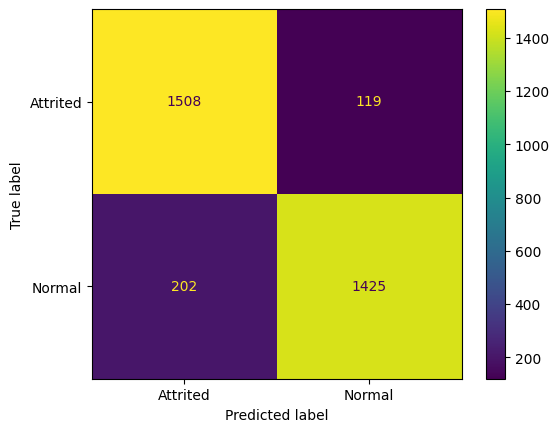

In [ ]:
#gmodel = model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = cross_val_predict(model, X, y, cv=10)
cm = confusion_matrix(y, y_pred)
cmdisplay=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Attrited', 'Normal'])
cmdisplay.plot()
plt.show()

In [ ]:
recall_score = 1508/(1508+119)
recall_score

0.926859250153657

Random forest got beaten in the match against XGBoost.